<a href="https://colab.research.google.com/github/GeraldEspi/ADA-informes/blob/main/Kruskal's_MinimumSpanningTree%20Informe%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. **Kruskal’s Minimum Spanning Tree**

Para la correcta comprensión del algoritmo que se busca investigar primero es necesario explicar algunos conceptos.



**¿Qué es un árbol de expansión?**

>Un árbol de expansión es un subconjunto de un gráfico conectado G, donde todos los bordes están conectados, es decir, uno puede atravesar cualquier borde desde un borde particular con o sin intermedios. Además, un árbol de expansión no debe tener ningún ciclo. Así podemos decir que si hay N vértices en un grafo conexo entonces el no. de aristas que puede tener un árbol de expansión es N-1.

**¿Qué es un árbol de expansión mínimo?**

>El árbol de expansión de peso mínimo es aquel que comienza desde un vértice y encuentra todos sus nodos accesibles y las relaciones en conjunto que permiten que se conecten dichos nodos con el menor peso posible. 

**¿Cuántas aristas tiene un árbol de expansión mínimo?**

> Un árbol de expansión mínimo tiene **(V – 1)** aristas donde V es el número de vértices en el gráfico dado.


**Entrada:** Grafo no dirigido $G=(V,E)$ en el cual cada arco $e$ tiene un costo $c_e$

**Salida:**  Conexiones (arcos) con su peso y los nodos que componen el l Minimum Spanning Tree.

## 1.2 **Algoritmo**

**Para el algoritmo desarrollado por kruskal para encontrar el MST (Minimum Spanning Tree) se relizan los siguientes pasos:**

1. *se ordenan todos los bordes en orden no decreciente en función de su peso.*

2. *Se elije el borde más pequeño. Se comprueba si forma un ciclo con el árbol de expansión formado hasta ahora. Si el ciclo no se forma, se incluye este borde. De lo contrario, se desecha.*

3. *Se repite el paso 2 hasta que haya **(V-1)** aristas en el árbol de expansión.*

# 2. **Código**

In [ ]:
#______________________________
import random
import networkx as nx
import matplotlib.pyplot as plt
from termcolor import colored

#______________________________


In [96]:
# Clase especial para acomodar los grafos
# Kruskal es la ultima funcion de la clase
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices # Numero de nodos
        self.graph = [] # Almacena el grafo
    
    # Función para agregar un arco al grafo
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    # Una función de utilidad para encontrar el conjunto de un elemento i
    def find(self, parent, i):
        if parent[i] != i:
            # Reasignación del padre del nodo al nodo raíz 
            # como requiere la compresión de ruta
            parent[i] = self.find(parent, parent[i])
        return parent[i]

    # Una función que hace la unión de dos conjuntos de x e y
    # (usa unión por rango)
    def union(self, parent, rank, x, y):
        # Adjunte un árbol de rango más pequeño debajo de la raíz
        # del árbol de rango alto (Unión por rango)
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
        # Si los rangos son los mismos, haga uno como raíz e incremente su rango en uno
        else:
            parent[y] = x
            rank[x] += 1
    
    # Función que transforma el grafico en la clase a uno graficable por
    # la libreria networkx
    def crearGrafoNx(self,result):
        X = []
        Tree = nx.Graph()
        for u, v, w in result:
            if(u not in X):
                X.append(u)
                Tree.add_node(u)
            if(v not in X):
                X.append(v)
                Tree.add_node(v)
            Tree.add_edge(u,v, weight = w)
        return Tree
    
    # Función para mostrar el grafo recibido por la funcion en la pantalla
    def ShowGraph(self, r):
        T = self.crearGrafoNx(r) # Transforma el grafo a uno que networkx puede leer

        # spring_layout: define posiciones para los nodos del grafo
        pos=nx.spring_layout(T)

        # para mostrar los arcos con sus etiquetas
        labels = nx.get_edge_attributes(T,'weight')
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels,font_size=14)

        # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
        nx.draw(T,pos, node_color="gray", with_labels=True, node_size=800,
                font_color="white", font_size=14, font_weight="black", width=2.0, edge_color ="black")


    # La función principal para construir MST 
    # (Minimum Spanning Tree) usando el algoritmo de Kruskal.
    def KruskalMST(self, verbose = False, visualize= False):
        result = []  # Esto almacenará el Árbol de expansión mínima resultante.

        # Una variable de índice, utilizada para arcos ordenados.
        i = 0

        # Una variable de índice, utilizada para result[].
        e = 0
  
        # Paso 1: Ordene todos los arcos en orden creciente por su peso.
        # Si no se nos permite cambiar el gráfico dado,
        # podemos crear una copia del gráfico.
        if verbose:
            print(colored("\n*****************************************************************************************************************","green"))
            print(f"Primero hay que ordenar los arcos: {self.graph}.")
        self.graph = sorted(self.graph,
                            key=lambda item:item[2])
        if verbose:
            print(colored("Los arcos con menor peso van primero, quedando de la siguiente manera: , blue"), self.graph)
            print(colored("Y se crea el nuevo arbol","blue"), result , colored("que no tendra ciclos y conecta los","green"), self.V, colored("nodos","green"))
            print(colored("Nuevo árbol guarda los datos de la siguiente manera","blue"), colored("[nodo, nodo, peso].","yellow"))
 
        parent = []
        rank = []
 
        # Crear subconjuntos V con elementos individuales cada uno.
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        
        # El número de arcos a tomar siempre es igual a V-1 --> V es cantidad de nodos
        while e < self.V - 1:
            # Paso 2: se elije el arco más pequeño
            # e incremente el índice para la próxima iteración.
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            # Si incluir este arco no provoca un ciclo,
            # se agrega en el resultado y se incrementa el índice del resultado
            # para el arco siguiente.
            if verbose: 
                print(colored("///----------------------------------------///-----------------------------------------///","green"))
                print(colored("Se tiene los arcos en el nuevo árbol:","blue"),result)
                print(colored("Se comprueba si al agregar el arco","blue") ,colored("[","green"),u,v, colored("peso =","blue") ,w,colored("]","green") ,colored("se genera ciclo en el nuevo árbol.","blue"))
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
                if verbose:
                    print(colored("    El arco [","green"),u,v, colored("peso =","green"), w,colored("[","green"), colored("no generara ciclos en el nuevo árbol. Se agrega al árbol.","green"))
                    print(colored("    El nuevo árbol ahora tiene los siguientes arcos","blue"), result, ".")
                    if e >= self.V - 1: 
                        print(colored("    Con el nuevo arco agregado, el árbol tiene","blue"), e-1 ,colored("arcos para","green"), self.V, colored("nodos \n" ,"blue"))
                        print(colored("    No puede tener más nodos, entonces el nuevo árbol esta completo.","blue"))
            elif verbose:
                print(colored("    Si agregamos el arco","green"), colored("[","green"), u,v, colored("peso = ", "blue"), w,colored("]","green"),  colored("el nuevo árbol tendra ciclo, entonces descartamos el arco sin agregarlo al nuevo árbol.","blue"))
            # De lo contrario descartar el arco.
        
        if verbose:
            print(colored("///----------------------------------------///-----------------------------------------///","green"))
            print(colored("\n*****************************************************************************************************************","green"))
        
        if visualize:
            print("Mostrar árbol de costo minimo")
            self.ShowGraph(result)
        
        return result

Grafo al que se aplicara Kruskal:


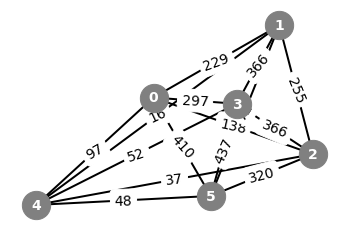

In [98]:
# Crea un grafo de tipo array de arrays
# que contiene [i, j, peso]
# siendo i y j los nodos conectados
def generadorDeInstancias(V):
  graph = Graph(V)
  for i in range(V):
    for j in range(i+1, V):
      graph.graph.append([i, j, random.randint(1, 500)])
  
  return graph


grafo = generadorDeInstancias(6)
print("Grafo al que se aplicara Kruskal:")
grafo.ShowGraph(grafo.graph)

## **Ejecución con Verbose = True**



In [105]:
# Driver's code
if __name__ == '__main__':
    # Function call
    tree = grafo.KruskalMST(True,False)
    
    minimumCost = 0
    print(colored("Arcos en el árbol de minimo costo construido:\n","blue"))
    print(colored("///----------------------------------------///-----------------------------------------///","green"))
    print("     %s -- %s | %s" % (colored("Nodo","yellow"), colored("Nodo","yellow"), colored("Peso","yellow")))
    for u, v, weight in tree:
        minimumCost += weight
        print("     %4d -- %4d | %4d" % (u, v, weight))
    print(colored("///----------------------------------------///-----------------------------------------///","green"))
    print(colored("\n- El costo total del nuevo árbol es de: ","blue"), minimumCost)


*****************************************************************************************************************
Primero hay que ordenar los arcos: [[1, 4, 16], [2, 4, 37], [4, 5, 48], [3, 4, 52], [1, 5, 72], [0, 4, 97], [0, 2, 138], [0, 1, 229], [1, 2, 255], [0, 3, 297], [2, 5, 320], [1, 3, 366], [2, 3, 366], [0, 5, 410], [3, 5, 437]].
Los arcos con menor peso van primero, quedando de la siguiente manera: , blue [[1, 4, 16], [2, 4, 37], [4, 5, 48], [3, 4, 52], [1, 5, 72], [0, 4, 97], [0, 2, 138], [0, 1, 229], [1, 2, 255], [0, 3, 297], [2, 5, 320], [1, 3, 366], [2, 3, 366], [0, 5, 410], [3, 5, 437]]
Y se crea el nuevo arbol [] que no tendra ciclos y conecta los 6 nodos
Nuevo árbol guarda los datos de la siguiente manera [nodo, nodo, peso].
///----------------------------------------///-----------------------------------------///
Se tiene los arcos en el nuevo árbol: []
Se comprueba si al agregar el arco [ 1 4 peso = 16 ] se genera ciclo en el nuevo árbol.
    El arco [ 1 4 peso = 16 

## **Visualize = True**

Mostrar árbol de costo minimo


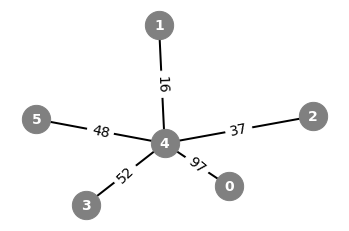

In [107]:
# Driver's code
if __name__ == '__main__':
    # Function call
    tree = grafo.KruskalMST(False,True)

# 3. **Tiempo de ejecución**

A continuación se busca profundizar en los tiempos de ejecución referentes a **Kruskal’s Minimum Spanning Tree** aproximación greedy

###*Teorema (Complejidad Temporal).*


*El algoritmo `Kruskal's: Minimum Spanning Tree` implementado a traves de **Greedy** tiene un **tiempo de ejecución** de $O(E * Log(V))$ o $O(E * log(E))$.*

###*Prueba del teorema.*

Para la resolución de este problema hay que tener ordenados los arcos de menor a mayor por su peso. Tenemos E arcos que ordenar, se utiliza sorted para ordenarlos, Complejidad temporal de la operación $\rightarrow O(E * log(E))$.

Se revisan y posiblemente agregan arcos al árbol siempre que la cantidad de arcos en el árbol de costo mínimo $e$ no sea igual a $V-1$. Esto se hace con **Union-Find** que toma como máximo $O(log(V))$ realizadas para los $E$ arcos del grafo de entrada. Complejidad temporal de la operación $\rightarrow O(E * log(V))$.

Al final podemos decir que la complejidad total de Kruskal es $O(E * log(E)) + O(E * log(V)) $⇒ $O(E * log(E) + E * log(V)) = O(E * (log(E) + log(V)))$.

* $V =$ es la cantidad de nodos que tiene el grafo de entrada.
* $E =$ es la cantidad de arcos que tiene el grafo de entrada. $V-1 \leq E < 2V$

Podemos decir que en tiempos de ejecución $O(E) = O(V)$, por ende $O(log(E)) = O(log(V))$.

Por eso $E * (log(E) + log(V))) = E * (2 * log(E)) \rightarrow  O(E * log(E)) = E * (2 * log(V)) \rightarrow  O(E * log(V)) $.

Como la $O(E * log(V)) = O(E * log(E))$ podemos decir que cualquiera de los dos es la complejidad de Kruskal.

Pero, aunque se pueden igualar $O(E * log(V)) = O(E * log(E))$, para mayor precisión se recomienda usar $O(E * log(V))$, porque $E=V$ no siempre es aplicable, ya que la cantidad de nodos y aristas puede ser muy diferente.

Por supuesto, en los casos donde es recomendable usar Kruskal, $E$ tiende a $V$, asi que comúnmente se toman como correcta ambas

Por ende, la complejidad del método es la complejidad del bucle, es decir, el método **Greedy** para este problema tiene complejidad $O(E * log(V))$ o $O(E * log(E))$.


# 4. **Correctitud**

Del **Kruskal’s Minimum Spanning Tree** aproximación greedy


### **Teorema (Correctitud).**





El algoritmo entrega un árbol de costo mínimo que conecta todos los nodos conectados por arcos con distintos pesos sin formar ciclos, estos nodos y arcos son entregados en forma de Grafo no dirigido (dicho grafo puede tener ciclos).

Finalmente, como la **propiedad de bucle invariante** es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $i$-ésima iteración del bucle donde $e = V-1$, se tendra un árbol con $V$ nodos conectados sin formar ningun ciclo.


#### **Prueba del Teorema**

Probaremos la siguiente **propiedad invariante de bucle** para el algoritmo `Kruskal's: Minimum Spanning Tree`:

> Al comienzo de cada iteración $i$ del bucle, tendremos un árbol con $e$ arcos sin que se formen ciclos ni que la cantidad de arcos iguale o supere la cantidad de nodos que deber tener el árbol.

Se busca que el nuevo árbol tenga $V$ nodos (igual que el grafo de entrada) y $V-1=e$ arcos.

$i$ es el arco que se revisa.

El **Kruskal** usado aplica el algoritmo **Union-Find**, un algoritmo correcto que nos permite saber si se forma ciclo en un grafo.

#### **Inicialización**

En la primera iteración $i=1$, tendremos un árbol vacío y revisaremos el arco $i$, que tiene el menor peso, se usa **Union-Find** para saber si agregar el arco provoca ciclos. Es imposible que se forme un ciclo con menos de 3 arcos, como el árbol esta vacío, agregar un arco no formara un ciclo y se agrega al árbol.

#### **Mantención**

Aplicando inducción, asumimos que, al comienzo de cada iteración, se cumple la propiedad. Es decir, en la iteración donde probamos agregar el arco $i$ al árbol, tenemos un árbol con los arcos $e = 1...i-1$ que no forman ciclos agregados, siendo los agregados $V-1$ siendo $V$ los nodos que buscamos agregar en el árbol.

Consideremos que $i=x$ como el arco que buscamos agregar con $1 < x < V$.

Se revisa el arco $x$, si ambos nodos del arco pertenecen al mismo sub-conjunto en el grafo entonces forman ciclo y no se agregarán al nuevo árbol de costo mínimo, en caso contrario se agregan al nuevo árbol. Esto se comprueba calculando el subconjunto al que pertenece cada nodo con **Find** del algoritmo **Union-Find**.

**Find** nos da un nombre para el subconjunto al que pertenece un nodo usando una lista con todos los nodos, se usa en ambos nodos del arco, si están presentes en el mismo subconjunto entonces forman un ciclo. La lista de nodos debe crearse desde los arcos **ya ordenados por peso**.

Cada vez que se agregue al nuevo árbol un arco que no genere ciclo, se revisa si la cantidad de arcos $e$ es igual a nodos $V$ menos 1, si $e = V-1$, entonces tenemos el árbol de costo mínimo porque no podemos agregar nodos más sin que se forme algún ciclo en el árbol.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.

#### **Correctitud**

Finalmente, como la **propiedad de bucle invariante** es verdadera al inicio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $i$-ésima iteración del bucle donde $e = V-1$, se tendra un árbol con $V$ nodos conectados sin formar ningun ciclo.

# 5. **Experiementos**

**A continuación se realizarán experimentos los cuales incluyen investigar:**

* Observar lo que ocurre con el tiempo del algoritmo a medida que aumenta la  cantidad de nodos del grafo.
* Comparar el algoritmo de Prim con el algoritmo de Kruskal

## 5.1 **Observar lo que ocurre con el tiempo del algoritmo a medida que aumenta la cantidad de nodos del grafo.**

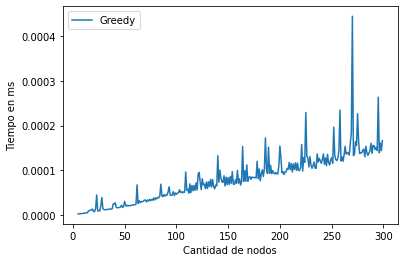

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]

for n in range(5,300):
    grafo = generadorDeInstancias(n)

    #la función repeat está ejecutando 10 veces Kruskal con el grafo de n nodos y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import Graph", stmt=f"{grafo.KruskalMST()}", repeat=1, number=10)

    x.append(n)
    y.append(t)


plt.plot(x,y)
plt.legend(["Greedy"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

## **Análisis de resultados**

Es evidente que la aproximación **Greedy** tiende a ser sustancialmente eficiente. 

En todos los casos tan demora una milésima parte de un segundo en conseguir la respuesta aún así el grafo tenga 300 nodos, aún así podemos ver un crecimiento  en sus tiempos de ejecución, y conforme el tamaño del problema aumenta, también lo hacen los montes, esto es esperable ya que, debido a los ínfimos tiempos que maneja el algoritmo, cualquier inestabilidad en el sistema puede comprometer también la eficiencia de la ejecución del algoritmo de manera notoria.

---
---

In [ ]:
import sys  # Library for INT_MAX
 
 
class Graph2():
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def MST(self, parent):
        r = []
        for i in range(1, self.V):
            r.append([parent[i], i, self.graph[i][parent[i]]])
        return r
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
        # Initialize min value
        min = sys.maxsize
        min_index = -1
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V  # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1  # First node is always the root of
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
 
            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
 
                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        
        return self.MST(parent)

def graphToGraph2(G, n):
    g = Graph2(n)

    for u,v,w in G.graph:
        g.graph[u-1][v-1] = w
        g.graph[v-1][u-1] = w

    return g

# Driver's code
if __name__ == '__main__':
    g = generadorDeInstancias(4)
    gr = graphToGraph2(g,4)
 
    arbol = gr.primMST()
    print(arbol)

[[0, 1, 49], [0, 2, 26], [2, 3, 18]]


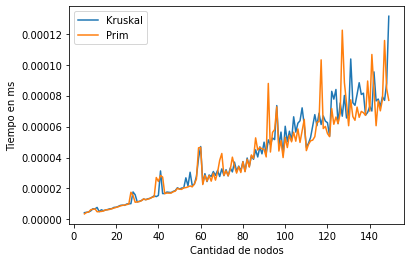

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]; y=[]; y1=[]

for n in range(5,150):
    grafo = generadorDeInstancias(n)
    grafo2 = graphToGraph2(grafo,n)

    #la función repeat está ejecutando 10 veces Kruskal con el grafo de n nodos y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import Graph", stmt=f"{grafo.KruskalMST()}", repeat=1, number=10)
    t1 = repeat(setup="from __main__ import Graph2", stmt=f"{grafo2.primMST()}", repeat=1, number=10)

    x.append(n)
    y.append(t)
    y1.append(t1)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Kruskal", "Prim"])

plt.xlabel('Cantidad de nodos')
plt.ylabel('Tiempo en ms')
plt.show()

Los tiempos de ejecucuón de ambos algoritmos no varían en gran medida uno de otro. Por lo que es necesario un análisis más profundo para idenfitificar la cuasa.

En primera instancia se puede decir que prim es objetivamente más lento que su homólogo, esto a causa de que su tiempo de ejecución corresponde a $O(V2)$ y por contraparte el de kruskal es $O(E∗log(V))$.

Una de las principales causas es el propio crecimiento de kurskal que es excesivo igualando de igual manera a prim. Por ende 